In [1]:
import os, sys
import os.path as osp
root_dir = osp.dirname(osp.dirname(os.getcwd()))
package_dir = osp.join(root_dir, 'src')
sys.path.append(package_dir)
from ml_modules.data.datasets import DeepSTABp_Dataset
from ml_modules.data.transforms import norm_0to1

import numpy as np
from tqdm.notebook import tqdm
from torch_geometric.utils import to_dense_adj
import matplotlib.pyplot as plt
plt.rc('axes', axisbelow=True)
plt.rcParams.update({'figure.autolayout': True})

dataset = DeepSTABp_Dataset(
    experiment='lysate',
    organism=None,
    cell_line=None,
    version='v3-ogt',
    transform=None # norm_0to1
)
Tm_dict = dataset.Tm_dict

ogt2idx = {
    3:  ('Oleispira antarctica',0),
    20: ('Caenorhabditis elegans',1),
    22: ('Arabidopsis thaliana',2),
    25: ('Drosophila melanogaster',3),
    28: ('Danio rerio',4),
    32: ('Saccharomyces cerevisiae',5),
    37: ('Bacillus subtilis',6),
    37: ('Escherichia coli',7),
    37: ('Homo sapiens',8),
    37: ('Mus musculus',9),
    55: ('Geobacillus stearothermophilus',10),
    60: ('Picrophilus torridus',11),
    70: ('Thermus thermophilus',12),
}
cm = plt.get_cmap('gist_rainbow')

edge_types = ['backbone', 'codir', 'pae', 'coord', 'contact', 'deform']

 -> Generating dataset from c:\Users\yenlin\Dropbox\projects\ai-thermostability\code\data\collation\DeepSTABp\lysate.csv
 -> Number of entries in meta file    : 29757
     >> mean value of Tm  : 49.8242
     >> range of Tm       : 30.4417-92.5729
 -> Number of unique accessions       : 29757
 -> Final number of accessions        : 20255
     >> mean value of Tm: 50.4288
     >> range of Tm     : 30.4417-92.5729
 -> Number of unique accessions       : 20255
Dataset instantiation complete.


In [2]:
save = True
test = False

  0%|          | 0/20255 [00:00<?, ?it/s]

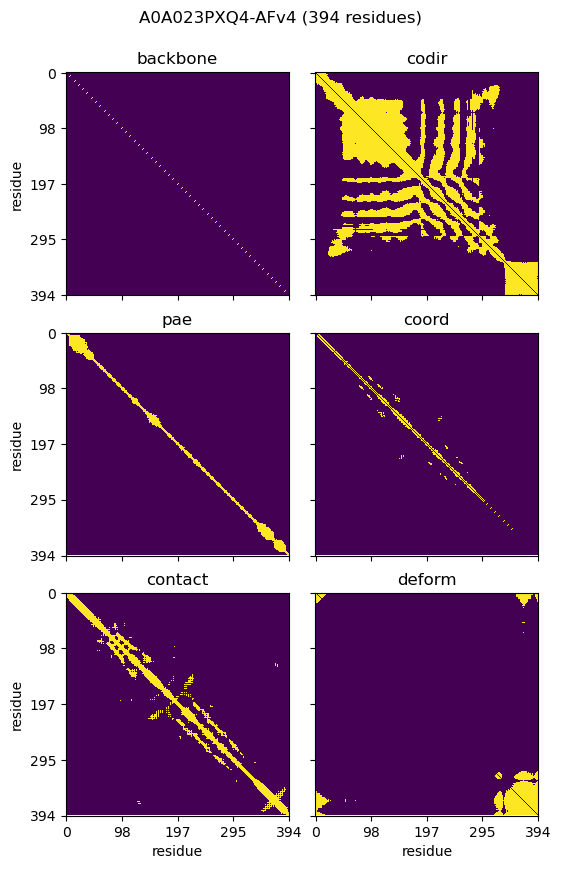

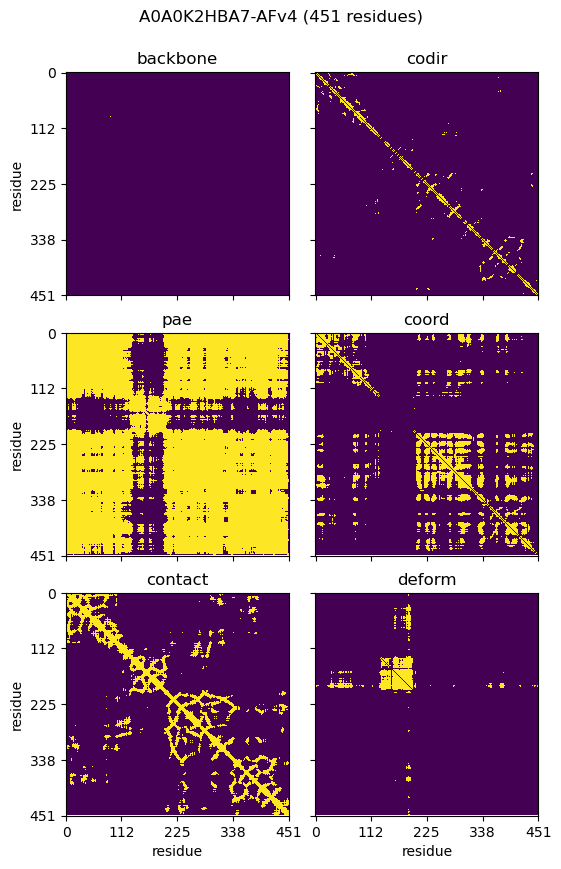

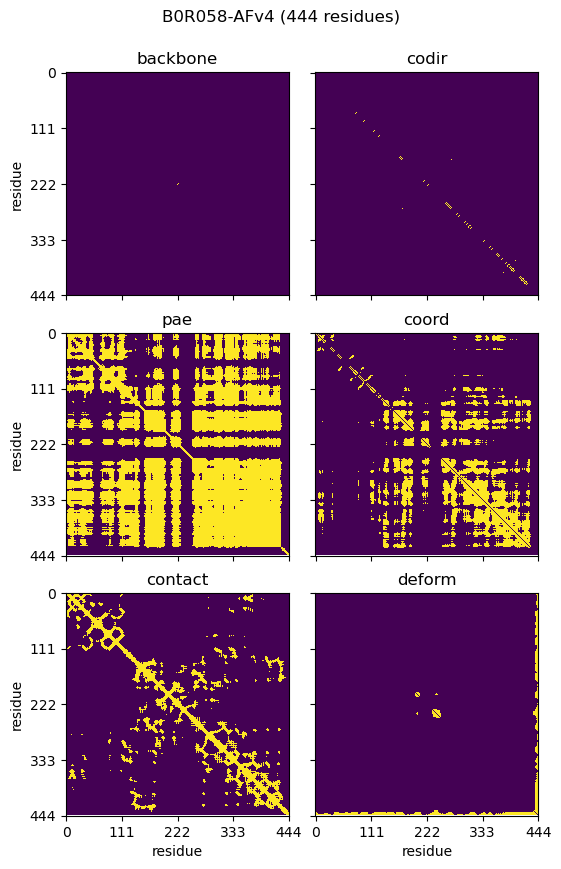

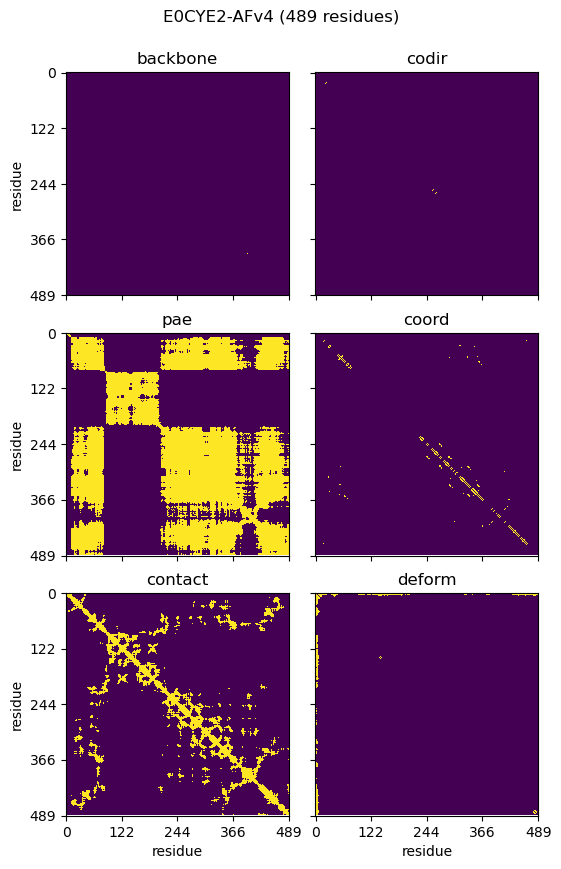

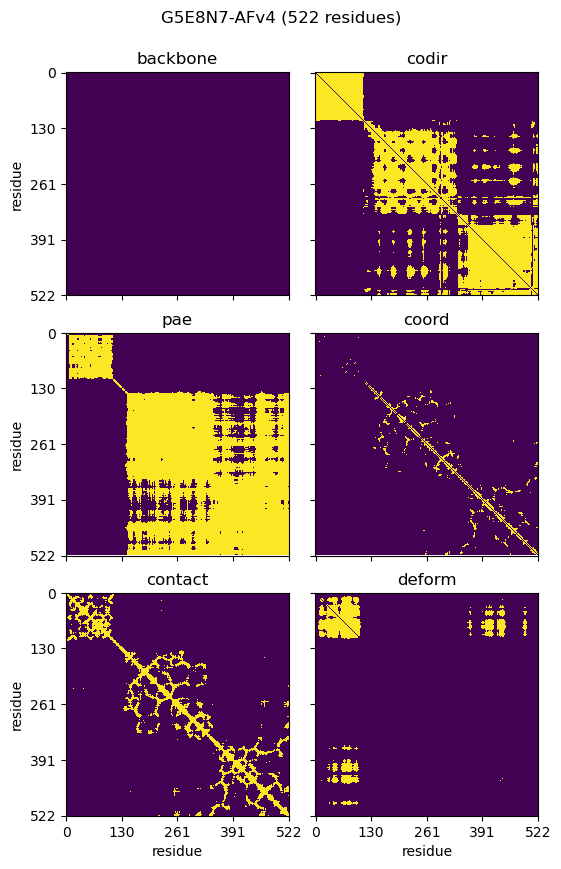

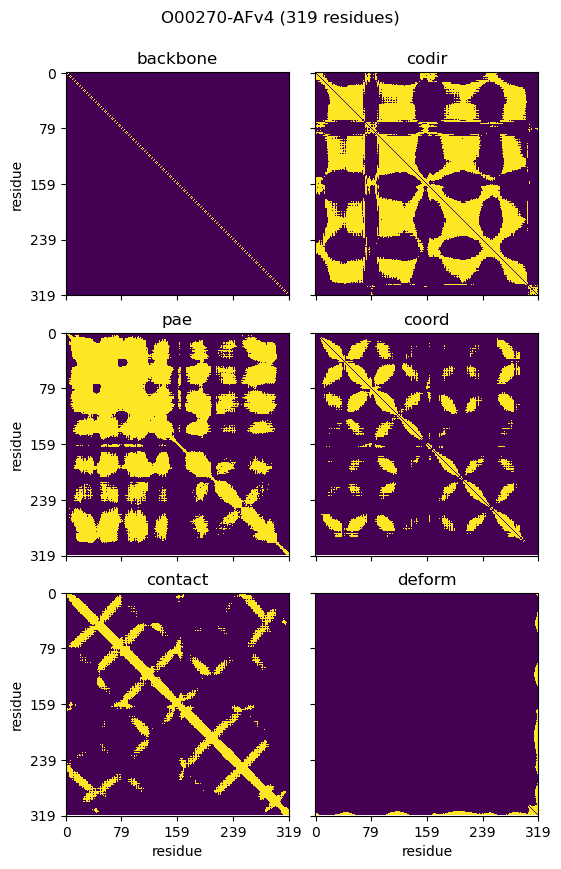

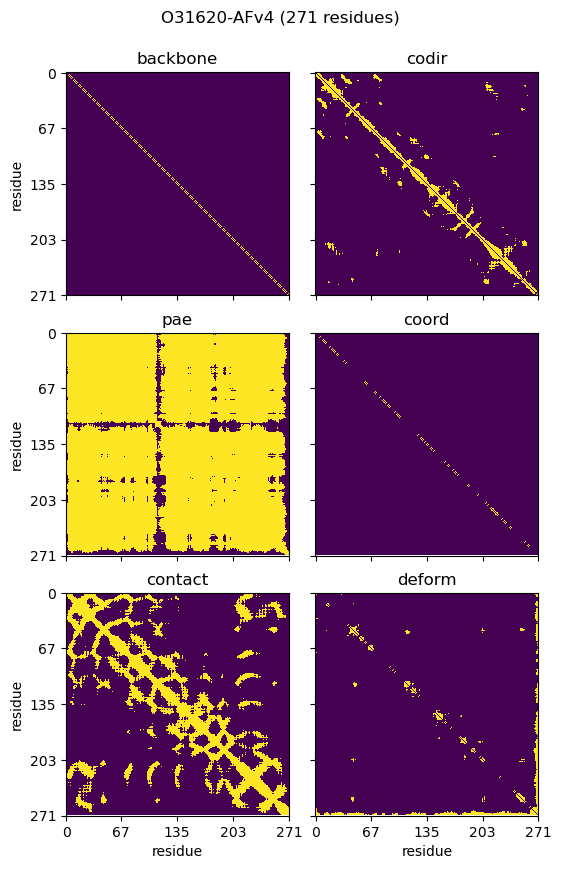

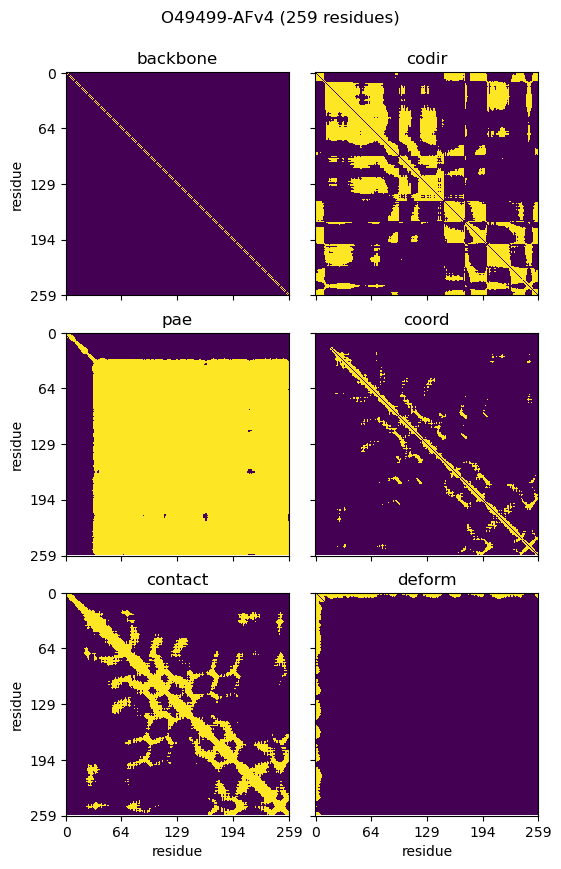

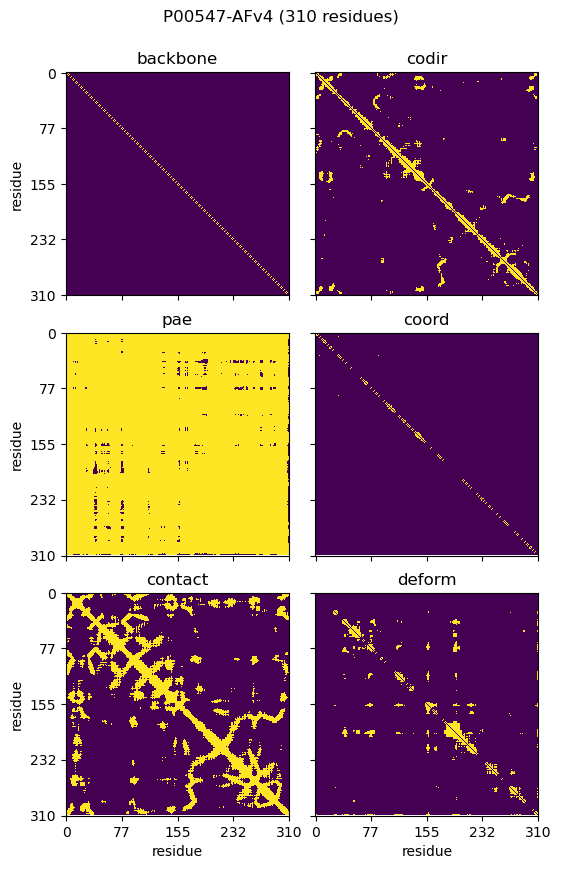

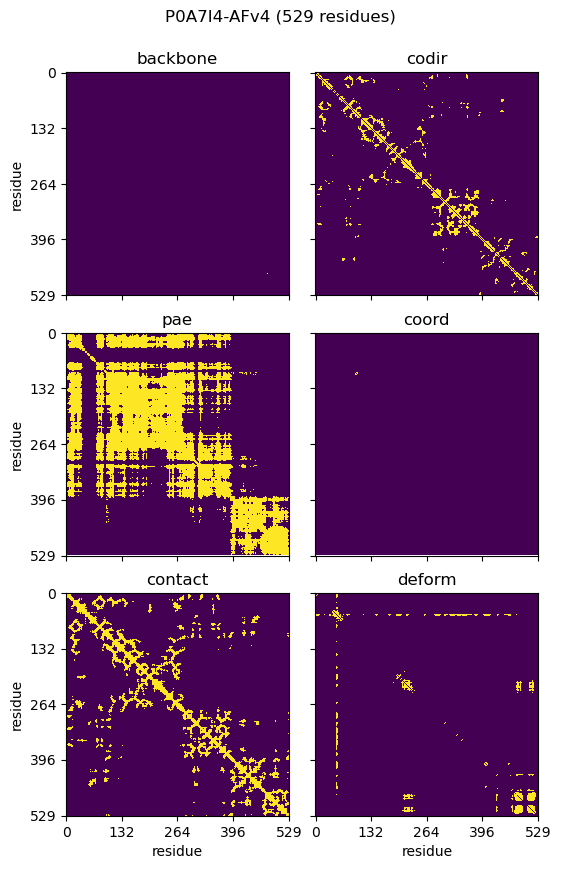

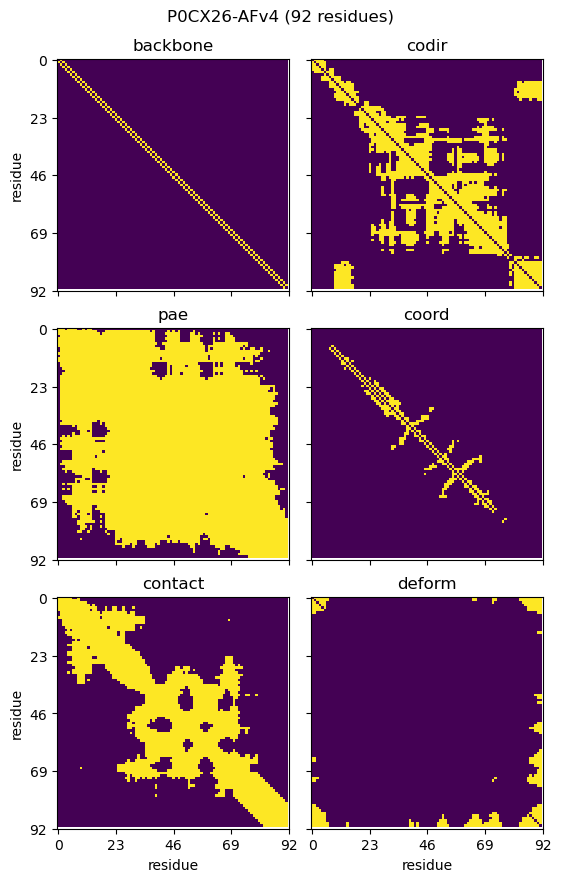

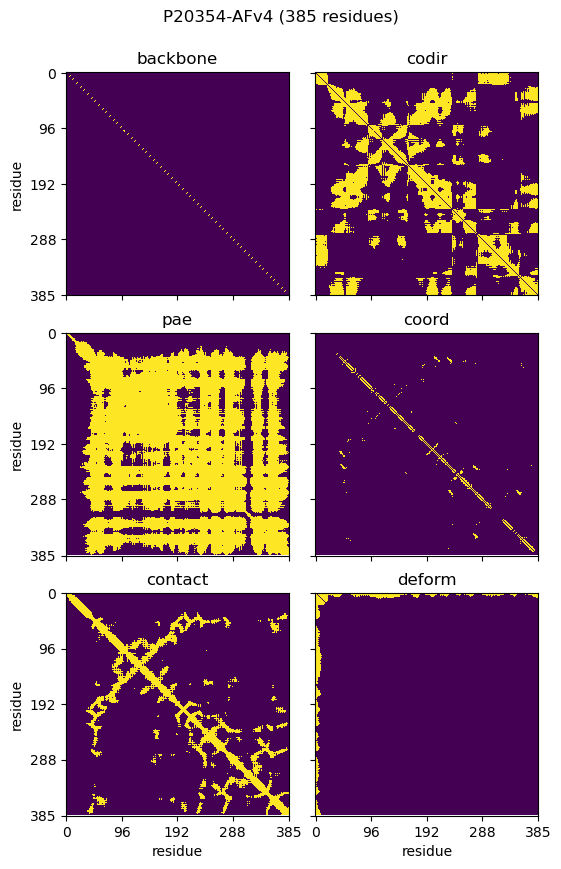

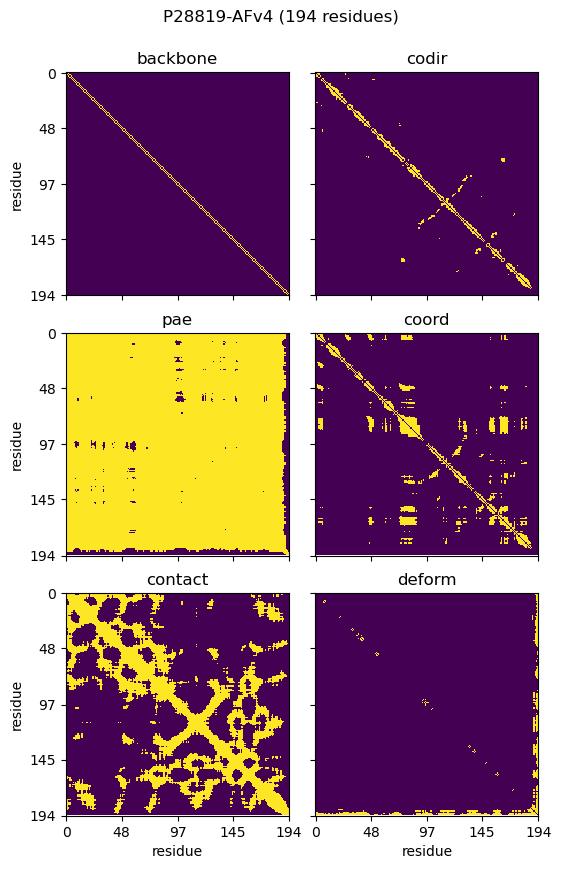

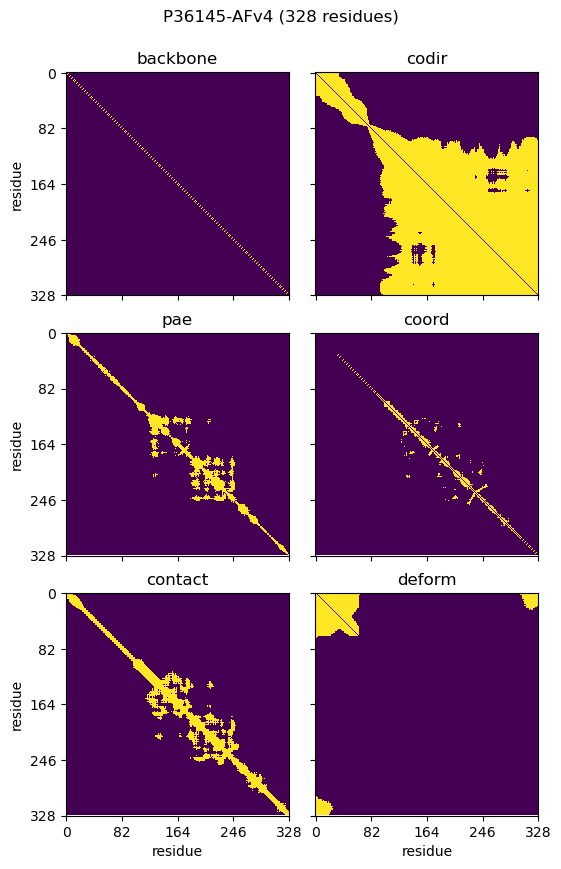

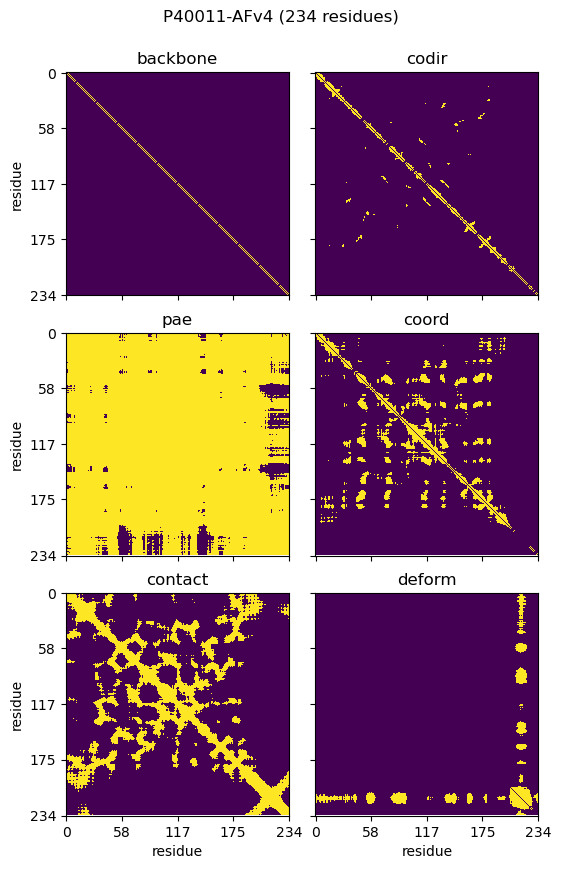

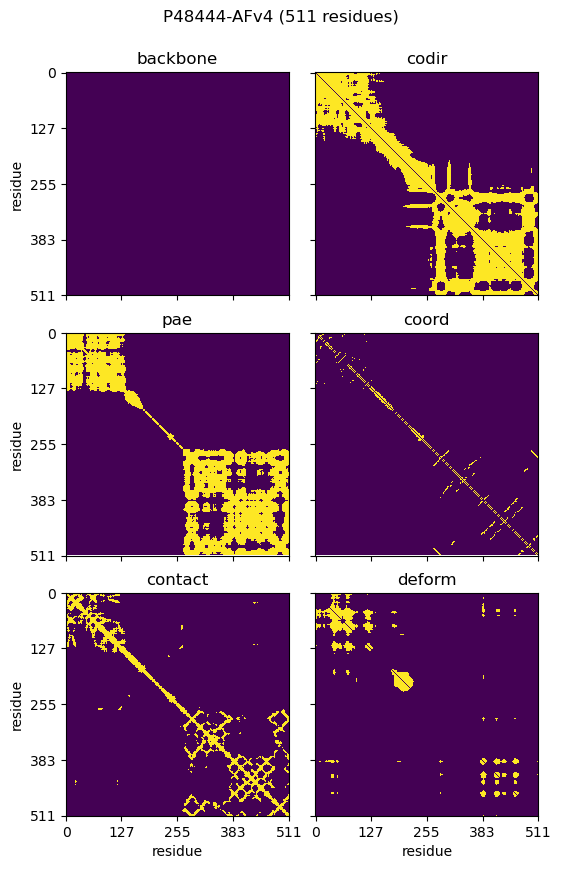

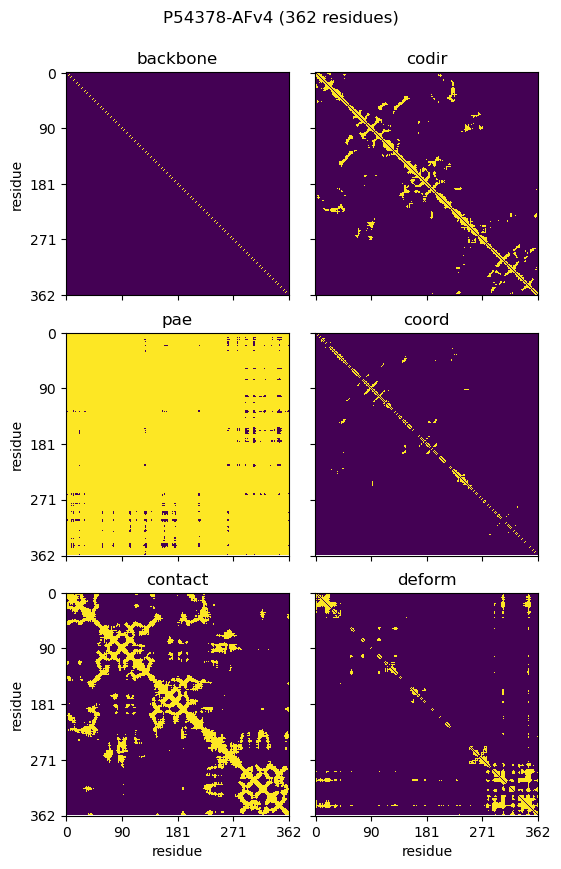

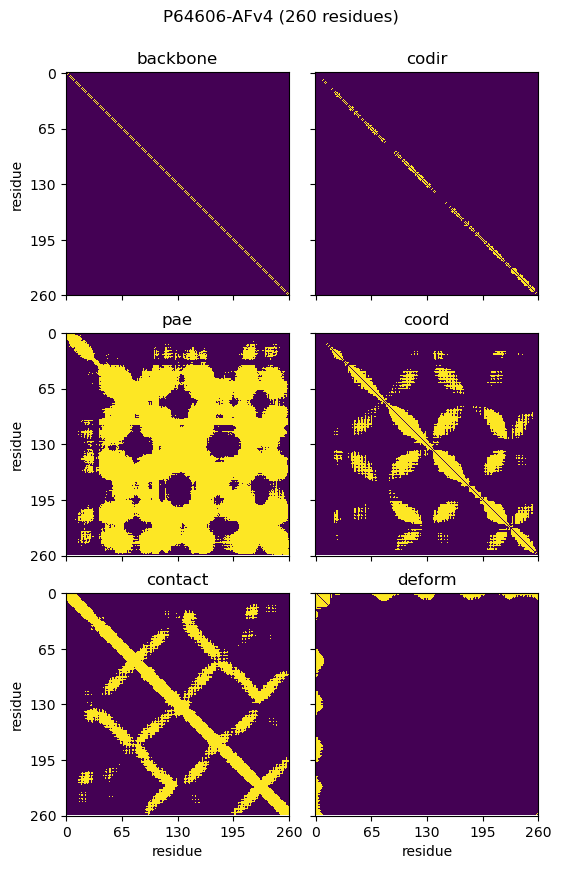

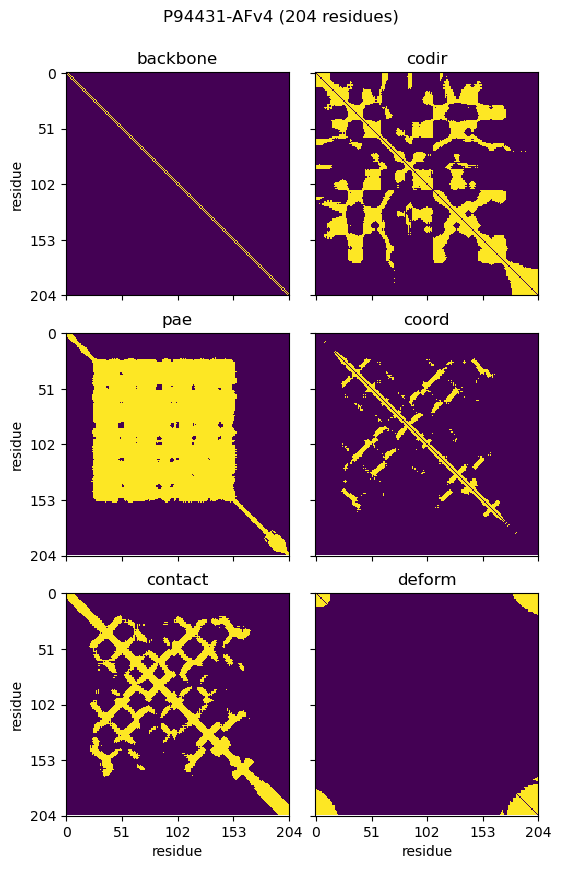

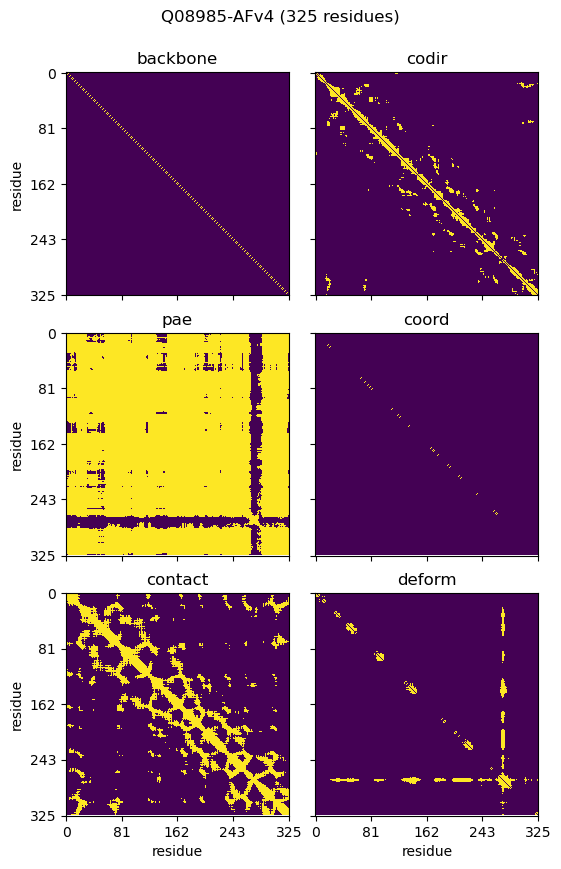

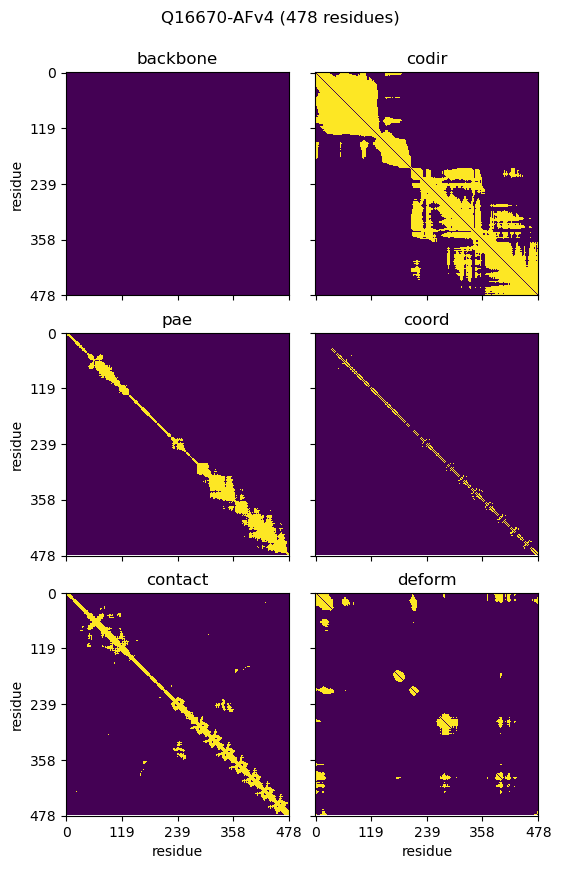

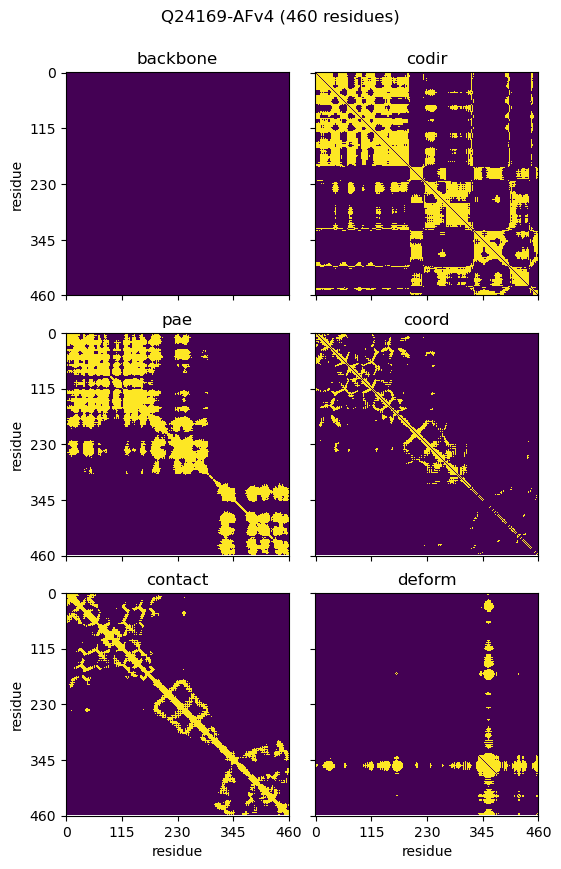

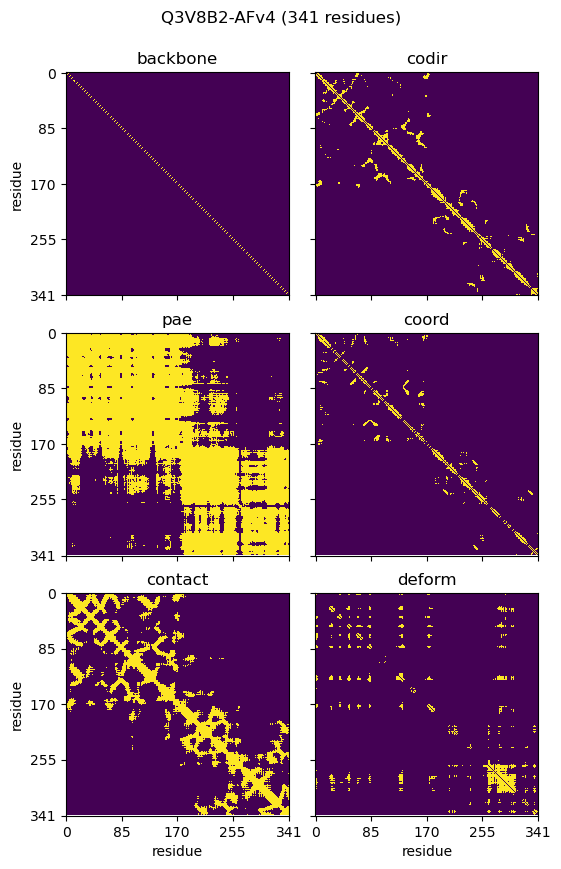

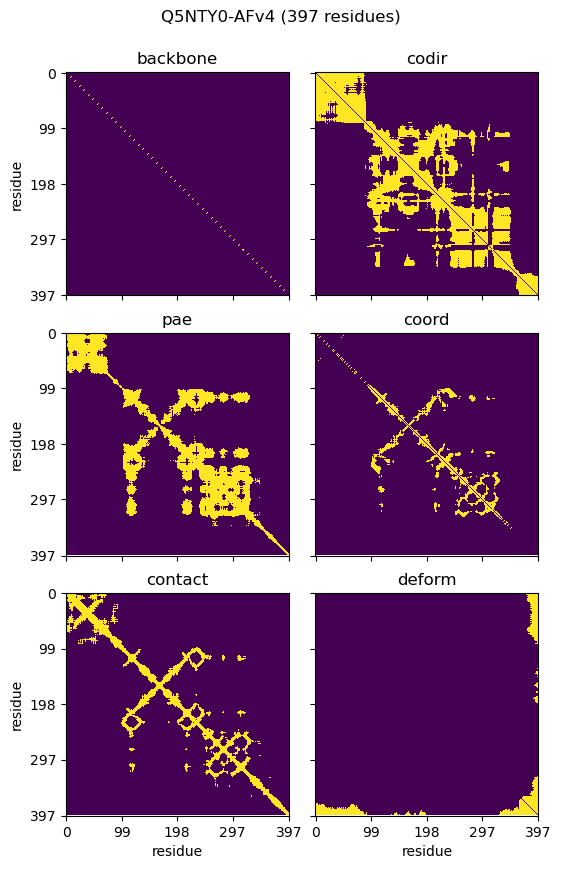

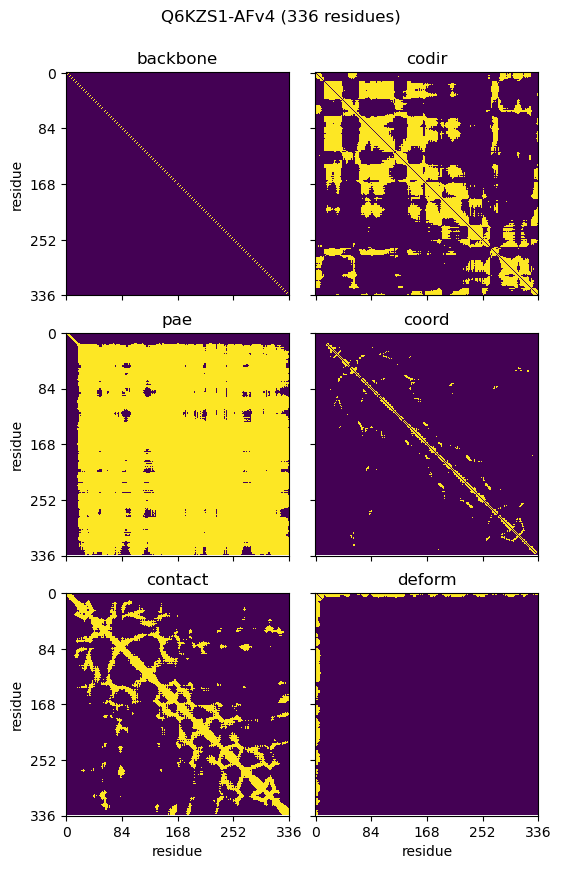

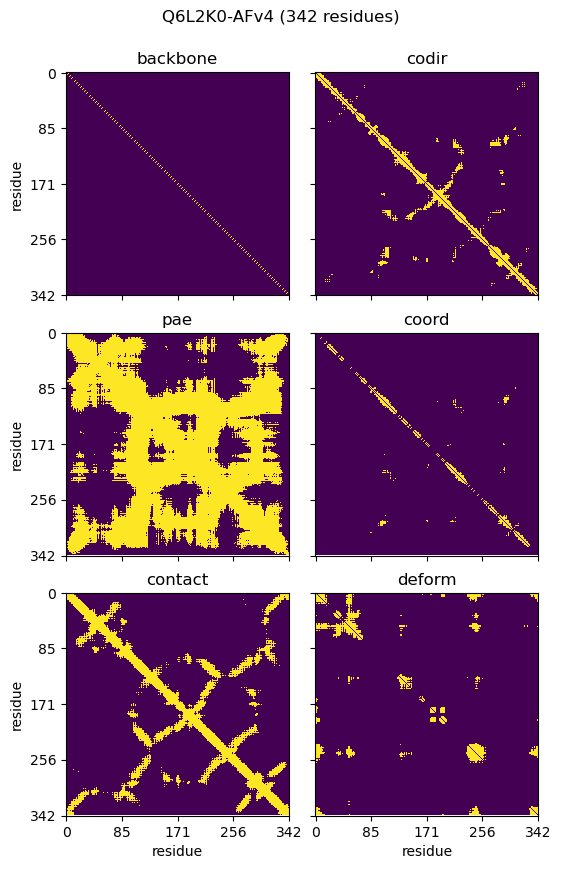

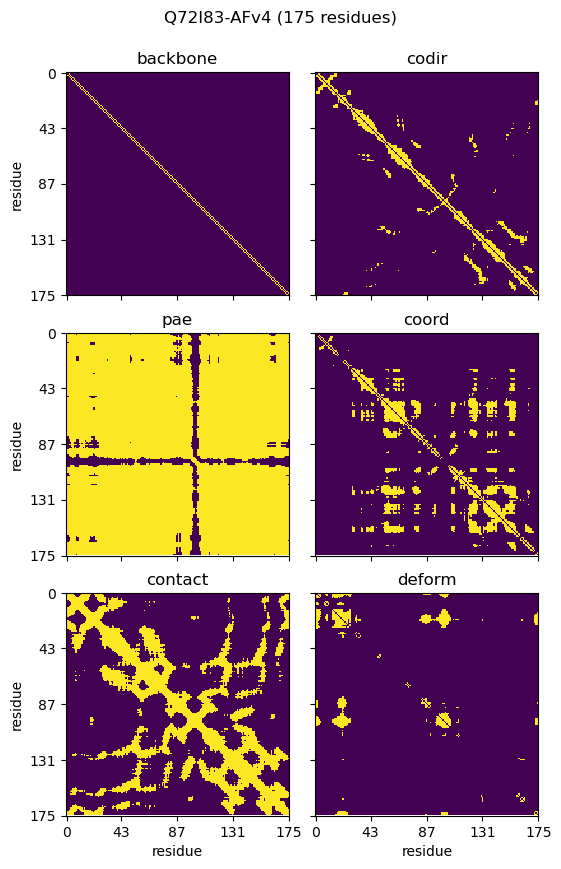

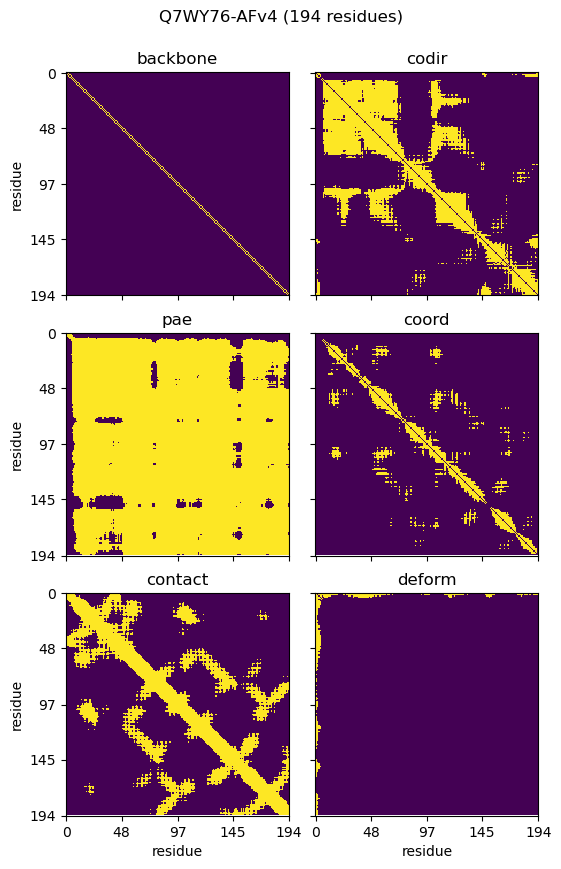

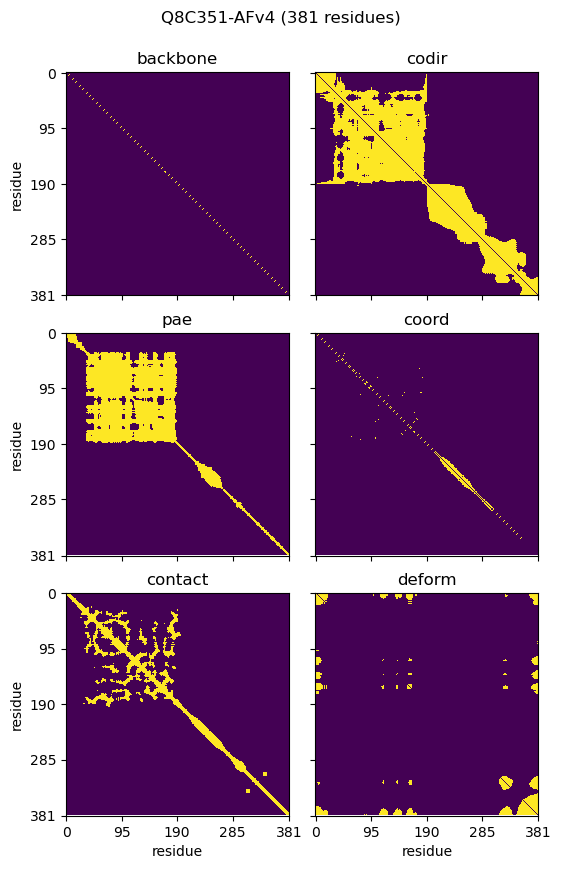

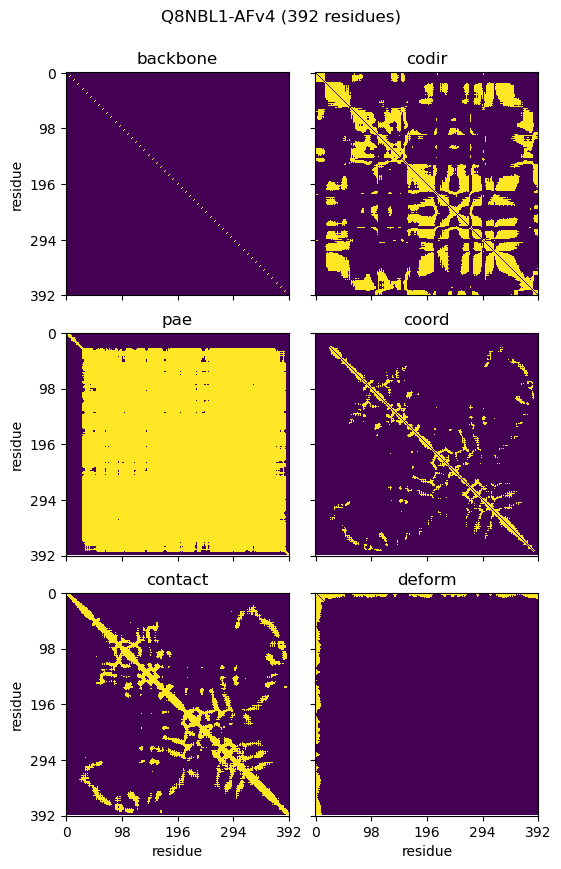

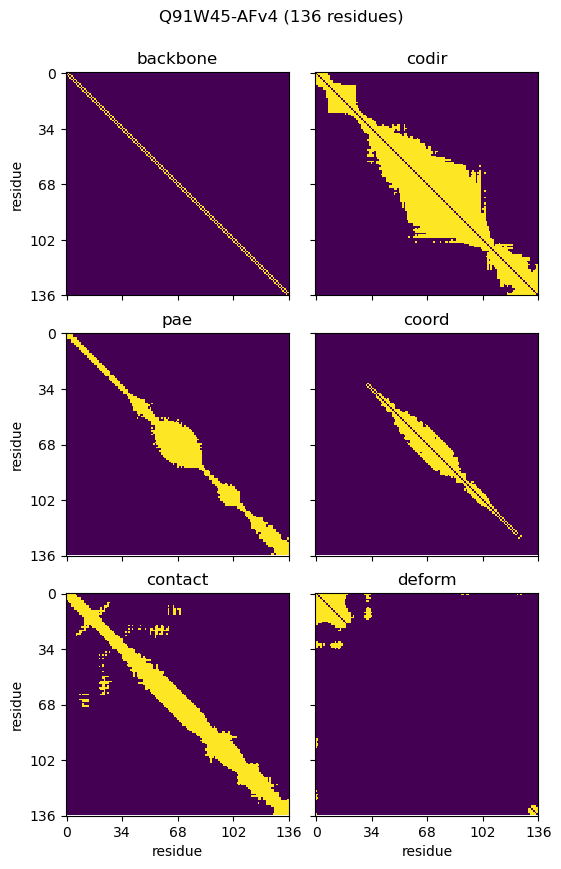

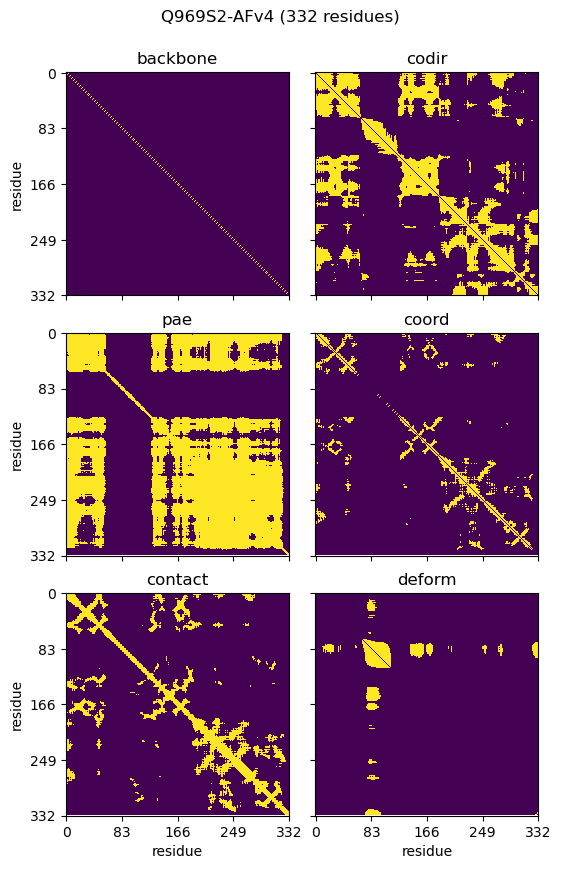

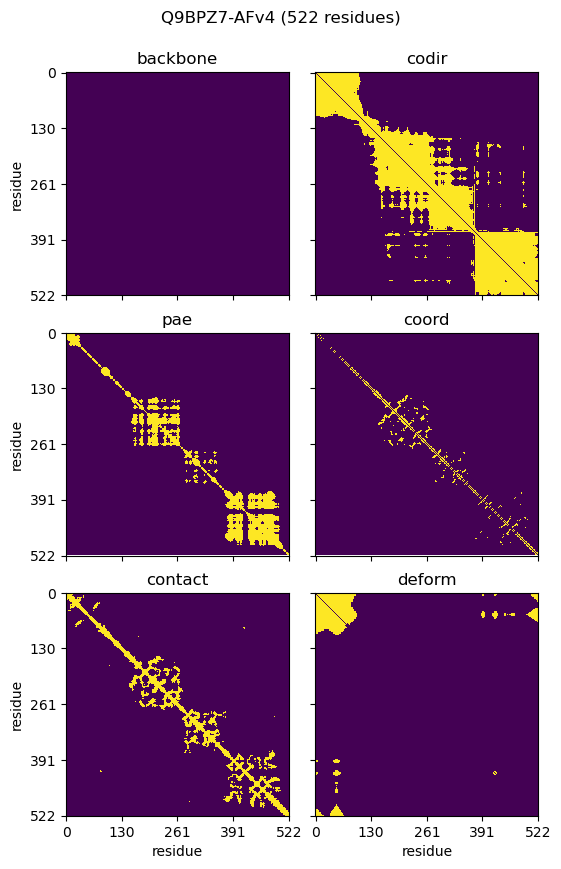

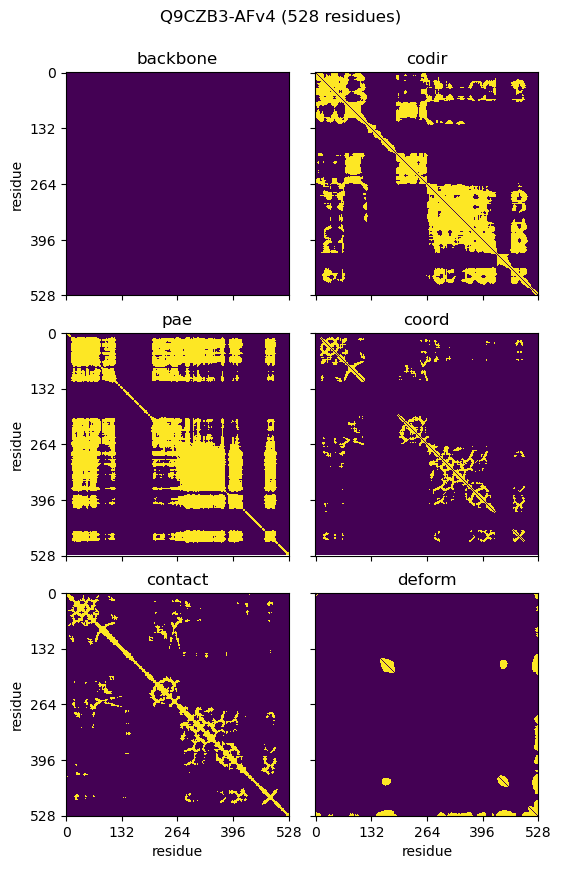

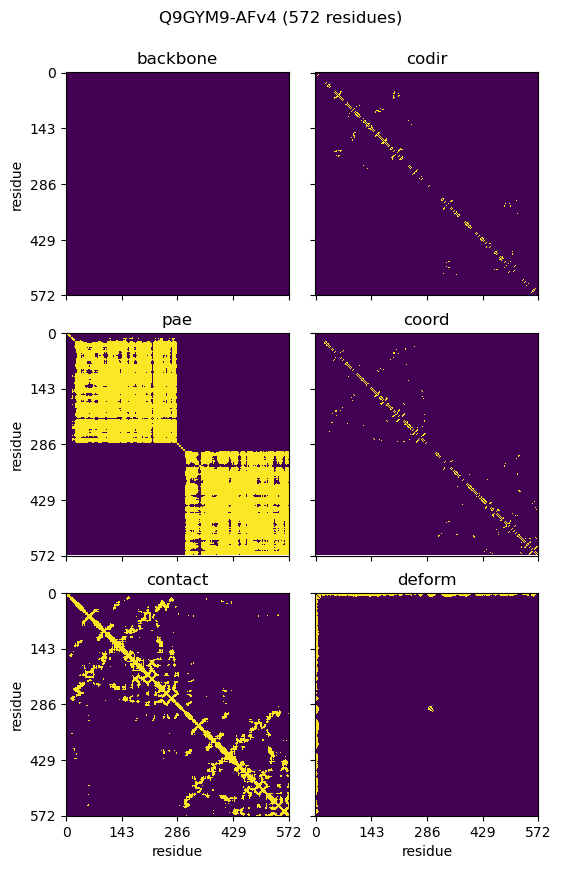

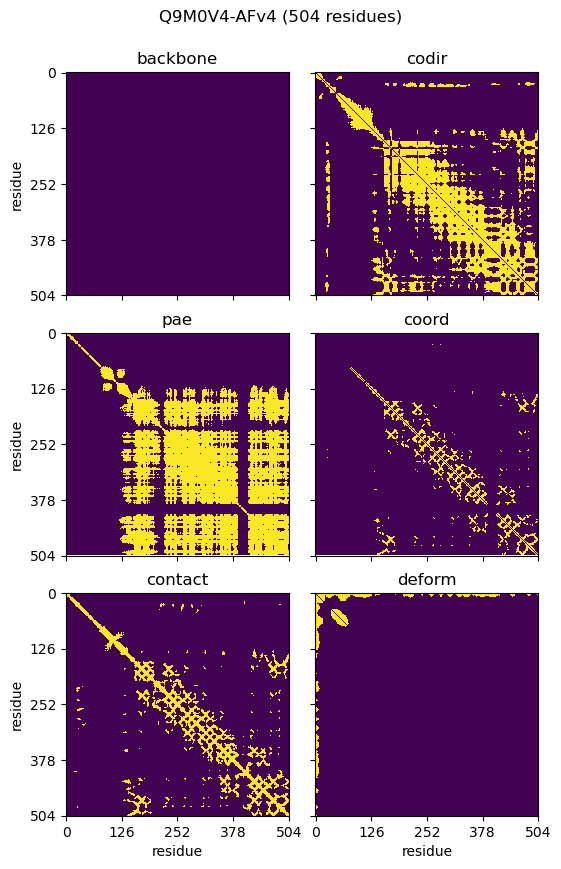

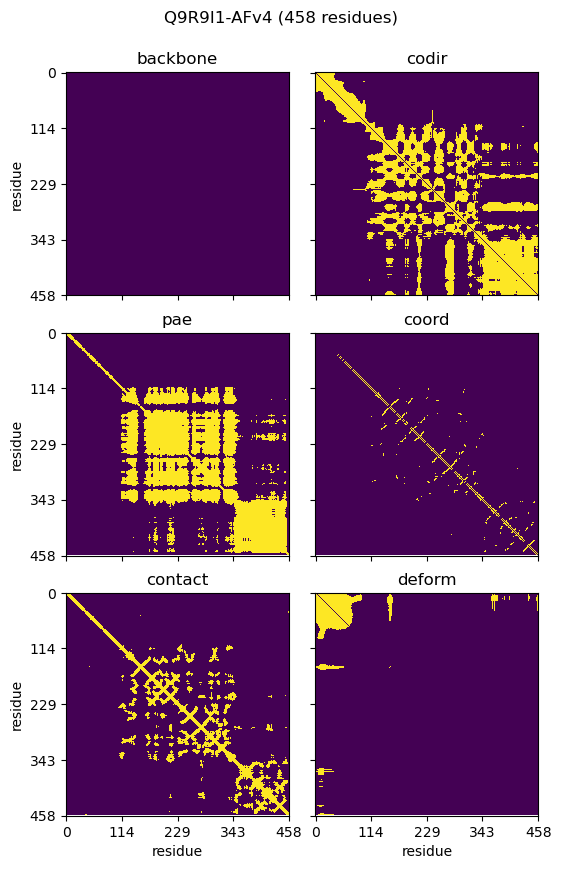

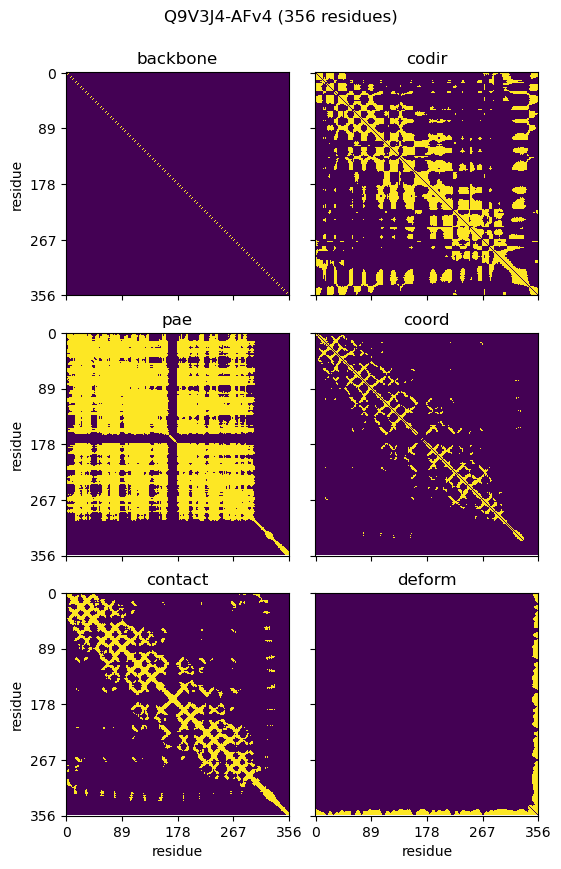

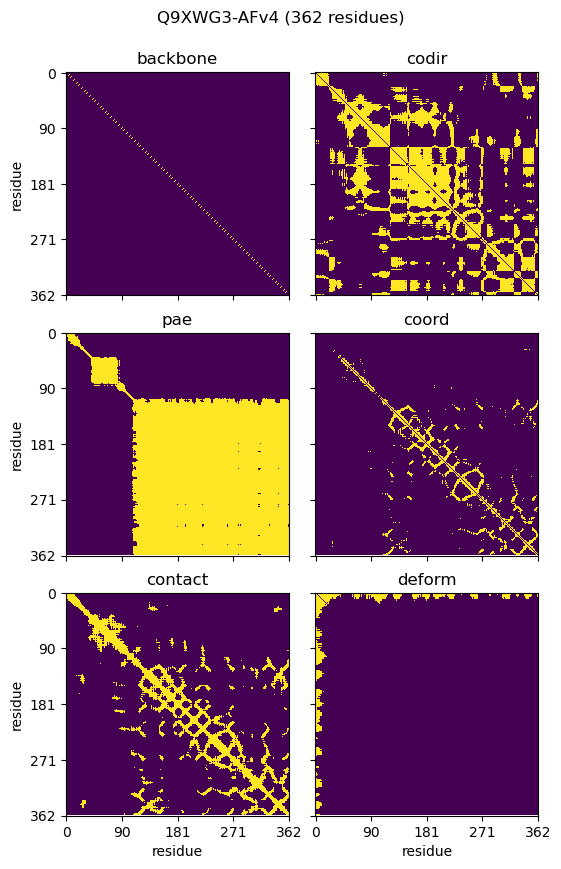

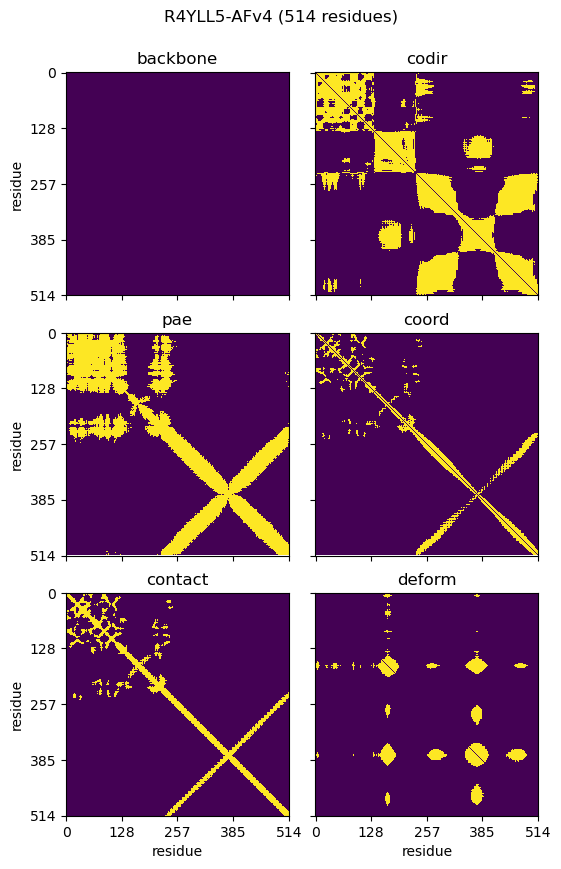

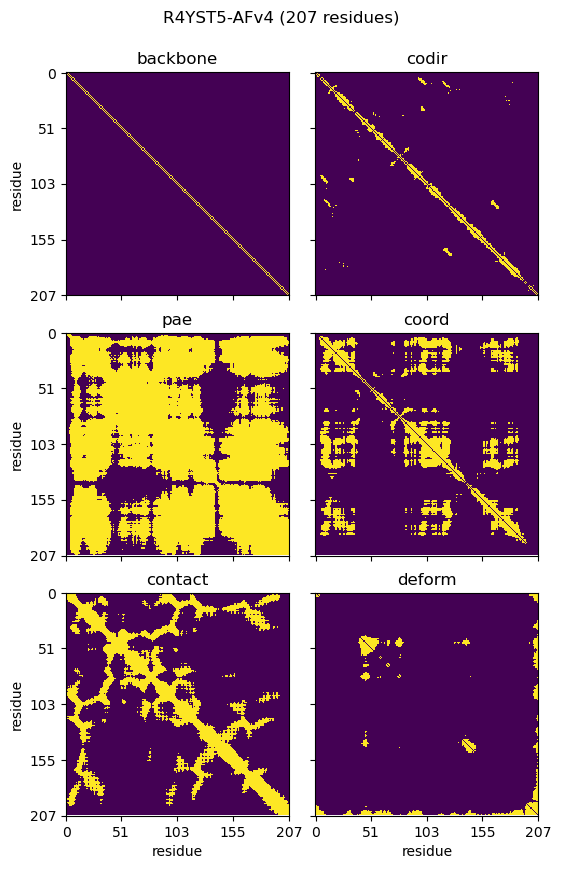

In [3]:
pbar = tqdm(dataset)
for i, data in enumerate(pbar):
    if i % 500 != 0:
        continue
    pbar.set_description(data['accession'])

    seq_len = data['residue'].num_nodes
    ticks = [0, seq_len//4, seq_len//2, seq_len*3//4, seq_len]

    fig, ax = plt.subplots(
        3, 2, sharex=True, sharey=True, figsize=(5.5, 9), layout='compressed'
    )
    ax = ax.flatten()
    fig.suptitle(f'{data["accession"]} ({seq_len} residues)')

    j = 0
    for edge_type in edge_types:

        # print(data[edge_type].edge_index.dtype)

        adj = to_dense_adj(
            edge_index=data['residue', edge_type, 'residue'].edge_index.long(),
            max_num_nodes=data.num_nodes
        ).squeeze()

        ax[j].matshow(adj)
        ax[j].set_title(edge_type)

        if j%2 == 0:
            ax[j].set_ylabel('residue')
        if j > 3:
            ax[j].set_xlabel('residue')
        ax[j].set_xticks(ticks)
        ax[j].set_xticklabels(ticks)
        ax[j].set_yticks(ticks)#, labels=[str(l) for l in ticks])
        ax[j].set_xticklabels(ticks)

        ax[j].xaxis.tick_bottom()
        
        j += 1

    if save:
        plt.savefig(f'sample{i}.png', dpi=300)#, bbox_inches='tight')
                    # transparent=True, )
    plt.show()
    plt.close()

    if i > 3 and test:
        break
